<a href="https://colab.research.google.com/github/ashlyjames/Project-Visual-Crypto/blob/main/MAINPRO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import keras
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
#from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.layers import BatchNormalization
from keras.optimizers import adam_v2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  


In [ ]:
os.chdir('/content/gdrive/MyDrive/Mainproject/Dataset/Class_00') 
X = []
y = []
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(200,200))
      X.append(img)
      y.append(0)
      #print(i[0:1])
os.chdir('/content/gdrive/MyDrive/Mainproject/Dataset/Class_01')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(200,200))
      X.append(img)
      y.append(1)
os.chdir('/content/gdrive/MyDrive/Mainproject/Dataset/Class_02')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(200,200))
      X.append(img)
      y.append(2)
os.chdir('/content/gdrive/MyDrive/Mainproject/Dataset/Class_03')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(200,200))
      X.append(img)
      y.append(3)
os.chdir('/content/gdrive/MyDrive/Mainproject/Dataset/Class_04')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(200,200))
      X.append(img)
      y.append(4)
os.chdir('/content/gdrive/MyDrive/Mainproject/Dataset/Class_05')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(200,200))
      X.append(img)
      y.append(5)
os.chdir('/content/gdrive/MyDrive/Mainproject/Dataset/Class_06')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(200,200))
      X.append(img)
      y.append(6)
os.chdir('/content/gdrive/MyDrive/Mainproject/Dataset/Class_07')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(200,200))
      X.append(img)
      y.append(7)
os.chdir('/content/gdrive/MyDrive/Mainproject/Dataset/Class_08')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(200,200))
      X.append(img)
      y.append(8)
os.chdir('/content/gdrive/MyDrive/Mainproject/Dataset/Class_09')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(200,200))
      X.append(img)
      y.append(9)

  0%|          | 0/523 [00:00<?, ?it/s]

  0%|          | 0/524 [00:00<?, ?it/s]

  0%|          | 0/524 [00:00<?, ?it/s]

  0%|          | 0/524 [00:00<?, ?it/s]

  0%|          | 0/524 [00:00<?, ?it/s]

  0%|          | 0/524 [00:00<?, ?it/s]

  0%|          | 0/524 [00:00<?, ?it/s]

  0%|          | 0/524 [00:00<?, ?it/s]

  0%|          | 0/524 [00:00<?, ?it/s]

  0%|          | 0/524 [00:00<?, ?it/s]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (200, 200, 3)
Shape of an image in X_test:  (200, 200, 3)


In [ ]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test) 
print("X_train Shape: ", X_train.shape) 
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape) 
print("y_test Shape: ", y_test.shape)

X_train Shape:  (4715, 200, 200, 3)
X_test Shape:  (524, 200, 200, 3)
y_train Shape:  (4715, 10)
y_test Shape:  (524, 10)


In [ ]:
# creating the base model of pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
# extracting features for training frames
X_train = base_model.predict(X_train)
X_train.shape

(4715, 6, 6, 512)

In [ ]:
X_test = base_model.predict(X_test)
X_test.shape

(524, 6, 6, 512)

In [ ]:
# reshaping the training as well as validation frames in single dimension
X_train = X_train.reshape(4715, 6*6*512)
X_test = X_test.reshape(524, 6*6*512)

# normalizing the pixel values
max = X_train.max()
X_train = X_train/max
X_test = X_test/max

# shape of images
X_train.shape

(4715, 18432)

In [ ]:
#defining the model architecture
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(18432,)))
model.add(Dropout(0.5))
#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

print('CNN Architecture Created')

print(model.summary())

CNN Architecture Created
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              18875392  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (N

In [ ]:
# defining a function to save the weights of best model
from keras.callbacks import ModelCheckpoint
mcp_save = ModelCheckpoint('/content/gdrive/MyDrive/Mainproject/weights_new29.hdf5', save_best_only=True, monitor='val_accuracy', mode='auto')
 
# compiling the model
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
 
# training the model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1, callbacks=[mcp_save], batch_size=64)

Epoch 1/20
67/67 [==============================] - 20s 282ms/step - loss: 1.1983 - accuracy: 0.6031 - val_loss: 0.0385 - val_accuracy: 1.0000
Epoch 2/20
67/67 [==============================] - 11s 159ms/step - loss: 0.0802 - accuracy: 0.9837 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 3/20
67/67 [==============================] - 11s 163ms/step - loss: 0.0204 - accuracy: 0.9962 - val_loss: 1.4321e-04 - val_accuracy: 1.0000
Epoch 4/20
67/67 [==============================] - 10s 152ms/step - loss: 0.0090 - accuracy: 0.9991 - val_loss: 6.6395e-05 - val_accuracy: 1.0000
Epoch 5/20
67/67 [==============================] - 10s 152ms/step - loss: 0.0061 - accuracy: 0.9991 - val_loss: 4.3786e-05 - val_accuracy: 1.0000
Epoch 6/20
67/67 [==============================] - 10s 154ms/step - loss: 0.0041 - accuracy: 0.9995 - val_loss: 7.4252e-06 - val_accuracy: 1.0000
Epoch 7/20
67/67 [==============================] - 10s 154ms/step - loss: 0.0043 - accuracy: 0.9995 - val_loss: 8.3417e-06 - 

In [ ]:
model.load_weights("/content/gdrive/MyDrive/Mainproject/weights_new13.hdf5")

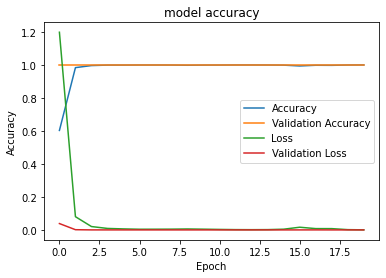

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","Loss","Validation Loss"])
plt.show()

In [ ]:
target_proba = model.predict(X_test, batch_size=1).astype(int)
classes_x=np.argmax(target_proba,axis=1)

In [ ]:
y_test = np.argmax(y_test, axis=1)

82.633 accuracy for weights_new14.hdf5, 1024,256,10 for 50 epochs
98.66 acc for weights_new18.hd , 1024,256,10 for 100 epochs
86.25 acc for weights_new24. , 1024,256,128,10 for 20 epo


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(classes_x, y_test)*100

90.07633587786259

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(classes_x,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        62
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        51
           4       1.00      1.00      1.00        49
           5       0.98      1.00      0.99        48
           6       0.98      1.00      0.99        53
           7       1.00      1.00      1.00        60
           8       1.00      1.00      1.00        49
           9       1.00      1.00      1.00        51

    accuracy                           1.00       524
   macro avg       1.00      1.00      1.00       524
weighted avg       1.00      1.00      1.00       524



In [ ]:
 images = glob("/content/gdrive/MyDrive/Mainproject/temp4/*.jpg")
    # converting all the frames for a test video into numpy array
prediction_image = np.array(prediction_image)
    # extracting features using pre-trained model
prediction_image = base_model.predict(prediction_image)
    # converting features in one dimensional array
prediction_image = prediction_image.reshape(prediction_images.shape[0], 7*7*512)
    # predicting tags for each array
prediction = model.predict(prediction_images)
classe_x   = np.argmax(prediction)